**实验目标：**
通过本实验，你将学习并实践信号处理中的三个重要任务：端点检测、基音周期检测以及 MFCC 特征提取。这些任务是语音信号处理和音频处理中的基础，对于语音识别和语音分析等应用至关重要。其中，端点检测、基音周期检测实验可以二选一，MFCC特征提取实验必须完成。

**实验方法：**

**1. 端点检测：**
  - 阅读端点检测的相关文献或资料，了解双门限法的原理和实现方式。
  - 使用 Python 编程语言，实现端点检测算法。
  - 在代码中设定合适的阈值来检测端点，你可以尝试不同的阈值来获取更好的效果。
  - 编写代码以可视化端点检测结果，将检测到的端点在原始信号上标出。

**2. 基音周期检测：**
  - 学习基音周期检测的原理，理解基音周期在语音信号中的重要性。
  - 使用 librosa 库或其他音频处理库加载音频数据。
  - 探索基音周期检测的方法，并尝试实现其中一种方法。你可以使用自相关函数或其他方法来检测基音周期。
  - 编写代码以可视化基音周期检测的结果，将检测到的基音周期在音频信号上标出。

**3. MFCC 特征提取：**
  - 了解 MFCC 特征在语音信号处理中的重要性以及其在语音识别中的应用。
  - 使用 librosa 库或其他音频处理库加载音频数据。
  - 实现 MFCC 特征提取算法。
  - 编写代码以可视化提取的 MFCC 特征，观察不同时间段内的特征变化。
  
**实验要求：**

录制一段音频，并开展上述实验，并可视化实验结果，并保存图片到本地。其中实验1和2可任选一个，实验3必做。

In [1]:
# #安装依赖库，可以跳过已安装的库
%pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simpleNote: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [59 lines of output]
  C:\ProgramData\anaconda3\Lib\site-packages\setuptools\dist.py:745: SetuptoolsDeprecationWarning: Invalid dash-separated options
  !!
  
          ********************************************************************************
          Usage of dash-separated 'distribution-name' will not be supported in future
          versions. Please use the underscore name 'distribution_name' instead.
  
          This deprecation is overdue, please update your project and remove deprecated
          calls to avoid build errors in the future.
  
          See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
          ********************************************************************************
  
  !!
    opt = self.warn_dash_deprecation(opt, section)
  C:\ProgramData\anaconda3\Lib\site-packages\setuptools\dist.py:745: Set


     ---------------------------------------- 0.0/164.1 kB ? eta -:--:--
     ------- -------------------------------- 30.7/164.1 kB ? eta -:--:--
     ------- -------------------------------- 30.7/164.1 kB ? eta -:--:--
     ------------- ----------------------- 61.4/164.1 kB 328.2 kB/s eta 0:00:01
     ---------------- -------------------- 71.7/164.1 kB 326.8 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/164.1 kB 409.6 kB/s eta 0:00:01
     ------------------------ ----------- 112.6/164.1 kB 409.6 kB/s eta 0:00:01
     -----------------------------------  163.8/164.1 kB 409.6 kB/s eta 0:00:01
     ------------------------------------ 164.1/164.1 kB 339.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/253.7 kB 960.0 kB/s eta 0:00:01
     ---------- -------------------------- 71.7/253.7 kB 777.7 kB/s eta 0:00:01
     ----------------- ------------------ 122.9/253.7 kB 901.1 kB

In [34]:
# 如果上面安装失败，可以使用下面的命令分别安装
# %pip install numpy
# %pip install matplotlib
# %pip install scipy
# %pip install pandas
%pip install pyaudio
# %pip install wave
# %pip install librosa
# %pip install IPython

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/82/d8/f043c854aad450a76e476b0cf9cda1956419e1dacf1062eb9df3c0055abe/PyAudio-0.2.14-cp311-cp311-win_amd64.whl (164 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# %pip show numpy
# %pip show matplotlib
# %pip show scipy
# %pip show pandas

%pip show pyaudio

# %pip show wave

# %pip show librosa
# %pip show IPython
# 如果显示WARNING: Package(s) not found,则需要安装对应依赖库

Name: PyAudioNote: you may need to restart the kernel to use updated packages.

Version: 0.2.14
Summary: Cross-platform audio I/O with PortAudio
Home-page: https://people.csail.mit.edu/hubert/pyaudio/
Author: Hubert Pham
Author-email: 
License: MIT
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: 
Required-by: 


我们鼓励大家使用自己录制的音频进行实验，下面是录制音频的简单示例，可根据自己设备的情况，对录制时长和采样率进行调整

In [3]:
#录制音频
def record_audio(duration):
    import pyaudio
    import wave

    CHUNK = 1024
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100
    WAVE_OUTPUT_FILENAME = "demo.wav"

    p = pyaudio.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* 录音中...")

    frames = []

    for i in range(0, int(RATE / CHUNK * duration)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* 录音结束!")

    stream.stop_stream()
    stream.close()
    p.terminate()

    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()
    
record_audio(duration=5) #录音5秒,并保存为demo.wav


* 录音中...
* 录音结束!


In [4]:
import IPython
IPython.display.Audio('./demo.wav') #播放demo.wav

In [1]:
#读取音频
import numpy as np
import scipy.io.wavfile as wav
sr, signal = wav.read('demo.wav')
print('采样率：', sr)
print("信号长度：", signal.shape)

采样率： 44100
信号长度： (220160,)


In [2]:
# 下面是一些会用到的音频处理函数
from speechlib import *
import os
def cut_zero(data):
    # 找到第一个非零元素的索引
    first_nonzero_index = next((i for i, x in enumerate(data) if x != 0), None)
    print("first_nonzero_index", first_nonzero_index)

    # 删除开头的所有零
    new_data = data[first_nonzero_index:]
    return new_data

实验1-1：基于双门限法的端点检测
需要补充下列方法: STEn、STZcr、vad_TwoThr

所有需要补充的代码都注释有TODO, 按要求补充即可

In [7]:
def STEn(x: object, win: object, inc: object) -> object:
    """
    计算短时能量函数
    :param x: 语音信号
    :param win: 窗长
    :param inc: 帧移
    :return: 短时能量，即每一帧的能量
    """
    # TODO 需要补充
    # 1.分帧
    frame = enframe(x, win, inc)
    
    # 2.计算短时能量
    # 3.返回短时能量
    return np.sum(frame ** 2) #  / len(frame)

def STZcr(x, win, inc, delta=0):
    """
    计算短时过零率
    :param x: 语音信号
    :param win: 窗长
    :param inc: 帧移
    :return: 短时过零率，即每一帧的过零率
    """
    # TODO 需要补充
    # 1.分帧
    frame = enframe(x, win, inc)
    
    # 2.计算短时过零率
    # 计算差分
    diff = np.diff(np.sign(frame))
    # 计算过零点的数量
    zero_crossings = np.sum(np.abs(diff) == 2)

    # 3.返回短时过零率
    return zero_crossings# / frame.shape[0]

def vad_TwoThr(x, wlen, inc, NIS):
    """
    使用门限法进行端点检测
    :param x: 语音信号
    :param wlen: 分帧长度
    :param inc: 帧移
    :param NIS: 用于计算门限的无话段长度
    :return: 语音段的起始点和终止点，语音段数，语音段标记，非语音段标记，短时能量，短时过零率
    """
    maxsilence = 15
    minlen = 5
    status = 0
    y = enframe(x, wlen, inc) # TODO 需要补充：调用enframe方法进行分帧
    fn = y.shape[0] # 帧数
    amp = STEn(x, wlen, inc) # 计算短时能量, 需要在上方方法定义里补充
    zcr = STZcr(x, wlen, inc, delta=0.01) # 计算短时过零率, 需要在上方方法定义里补充
    ampth = np.mean(amp[:NIS]) # 计算短时能量的平均值
    zcrth = np.mean(zcr[:NIS]) # 计算短时过零率的平均值
    amp2 = 2 * ampth
    amp1 = 4 * ampth
    zcr2 = 2 * zcrth
    xn = 0
    count = np.zeros(fn)
    silence = np.zeros(fn)
    x1 = np.zeros(fn)
    x2 = np.zeros(fn)
    for n in range(fn):
    # 0-静音，1-可能开始，2-确定开始，3-语音段
    
        if status == 0 or status == 1:
            if amp[n] > amp1: # 语音段的起始点
                x1[xn] = 0 # TODO 需要补充
                status = 2
                silence[xn] = 0
                count[xn] += 1
            elif amp[n] > amp2 or zcr[n] > zcr2: # 可能开始
                status = 1
                count[xn] += 1
            else: # 静音
                status = 0
                count[xn] = 0
                x1[xn] = 0
                x2[xn] = 0

        elif status == 2:
            if zcr[n] > zcr2: # TODO 需要补充
                count[xn] += 1
            else:
                silence[xn] += 1
                if silence[xn] < maxsilence:
                    count[xn] += 1
                elif count[xn] < minlen:
                    status = 0
                    silence[xn] = 0
                    count[xn] = 0
                else:
                    status = 3
                    x2[xn] = x1[xn] + count[xn]
        elif status == 3:
            status = 0
            xn += 1
            count[xn] = 0
            silence[xn] = 0
            x1[xn] = 0
            x2[xn] = 0
    el = len(x1[:xn])
    if x1[el - 1] == 0:
        el -= 1
    if x2[el - 1] == 0:
        print('Error: Not find endding point!\n')
        x2[el] = fn
    SF = np.zeros(fn)
    NF = np.ones(fn)
    for i in range(el):
        SF[int(x1[i]):int(x2[i])] = 1 # 语音段标记
        NF[int(x1[i]):int(x2[i])] = 0 # 非语音段标记
    voiceseg = findSegment(np.where(SF == 1)[0]) # 找到语音段
    vsl = len(voiceseg.keys())
    return voiceseg, vsl, SF, NF, amp, zcr # 返回语音段的起始点和终止点，语音段数，语音段标记，非语音段标记，短时能量，短时过零率

In [8]:
(fs, data) = wavfile.read('demo.wav') # 读取音频
data1 = data/np.max(np.abs(data))     # 幅值归一化

N = len(data1)
wlen = 200
inc = 80
IS = 0.1
overlap = wlen - inc
NIS = int((IS * fs - wlen) // inc + 1)
fn = (N - wlen) // inc + 1

frameTime = FrameTimeC(fn, wlen, inc, fs) # 计算每帧的时间刻度
time = [i / fs for i in range(N)]

voiceseg, vsl, SF, NF, amp, zcr = vad_TwoThr(data1, wlen, inc, NIS) # 语音段检测

# 打印语音段信息
fig, axs = plt.subplots(3, 1, figsize=(10, 8))  # Adjust figsize as needed 调整子图大小
plt.subplots_adjust(hspace=0.5)  # Adjust hspace for vertical spacing between subplots 调整子图间的垂直间距

axs[0].plot(time, data1)
axs[0].set_title('Endpoint detection using double threshold method')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time/s')

axs[1].plot(frameTime, amp)
axs[1].set_title('Short-time energy')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('Time/s')

axs[2].plot(frameTime, zcr)
axs[2].set_title('Short-time zero crossing rate')
axs[2].set_ylabel('Amplitude')
axs[2].set_xlabel('Time/s')

# 画出语音段的起始和终止点
for i in range(vsl):
    nx1 = voiceseg[i]['start']
    nx2 = voiceseg[i]['end']

    axs[0].axvline(frameTime[nx1], np.min(data1), np.max(data1), color='blue', linestyle='--')
    axs[0].axvline(frameTime[nx2], np.min(data1), np.max(data1), color='red', linestyle='-')
    axs[0].legend(['Waveform', 'Start', 'End'])

    axs[1].axvline(frameTime[nx1], np.min(amp), np.max(amp), color='blue', linestyle='--')
    axs[1].axvline(frameTime[nx2], np.min(amp), np.max(amp), color='red', linestyle='-')
    axs[1].legend(['Short-time energy', 'Start', 'End'])
    
    axs[2].axvline(frameTime[nx1], 0, 1, color='blue', linestyle='--')
    axs[2].axvline(frameTime[nx2], 0, 1, color='red', linestyle='-')
    axs[2].legend(['Short-time zero crossing rate', 'Start', 'End'], loc='upper right')

os.makedirs('figs', exist_ok=True) # 创建文件夹
plt.savefig('figs/vad.png') # 保存图片
plt.show()



IndexError: invalid index to scalar variable.

实验1-2：基于自相关法的基音周期检测
需要补充下列方法: pitch_Corr

In [3]:
def pitch_Corr(x, wnd, inc, T1, fs, miniL=1):
    """
    自相关法基音周期检测函数
    :param x: 语音信号
    :param wnd: 窗函数或窗长
    :param inc: 帧移
    :param T1: 门限
    :param fs: 采样率
    :param miniL: 语音段的最小帧数
    :return voiceseg, vsl, SF, Ef, period: 语音段的起始点和终止点，语音段数，语音段标记，非语音段标记，基音周期
    """
    y = enframe(x, wnd, inc) # TODO 需要补充：调用enframe方法进行分帧
    fn = y.shape[0]
    if isinstance(wnd, int):
        wlen = wnd
    else:
        wlen = len(wnd)
    voiceseg, vsl, SF, Ef = pitch_vad(x, wnd, inc, T1, miniL)  # 语音分段
    lmin = fs // 500  # 基音周期的最小值
    lmax = fs // 60  # 基音周期的最大值
    # print(lmin, lmax)
    period = np.zeros(fn)
    print("voiceseg", voiceseg)
    for i in range(vsl):    # 在所有语音段中
        print("i", i)
        print("vsl", vsl)
        print(f"voiceseg[{i}]", voiceseg[i])
        ixb = voiceseg[i]['start'] # 语音段的起始帧
        ixd = voiceseg[i]['duration'] # 语音段的帧数
        for k in range(ixd):
            # TODO 需要补充：输入y, 调用np.correlate计算短时自相关,并找到最大值,返回自相关函数ru
            frame = y[ixb + k, :]
            # print(frame.shape)
            ru = np.correlate(frame, frame, mode = 'full') #长度2*wlen - 1
            ru = ru[wlen:] # 截取后半部分，清除冗余
            # TODO 需要补充：输入ru找到范围内短时自相关最大值的标号,将其作为基音周期的估值,并存入period
            ru_max_index = np.argmax(ru[lmin:lmax]) + lmin
            # print(ru_max_index)
            period[ixb + k] = ru_max_index
    return voiceseg, vsl, SF, Ef, period

pre_zseg {0: {'start': 52, 'end': 56, 'duration': 5}, 1: {'start': 58, 'end': 59, 'duration': 2}, 2: {'start': 66, 'end': 71, 'duration': 6}, 3: {'start': 86, 'end': 101, 'duration': 16}, 4: {'start': 112, 'end': 113, 'duration': 2}, 5: {'start': 119, 'end': 131, 'duration': 13}, 6: {'start': 148, 'end': 148, 'duration': 1}, 7: {'start': 151, 'end': 151, 'duration': 1}, 8: {'start': 153, 'end': 216, 'duration': 64}, 9: {'start': 226, 'end': 235, 'duration': 10}, 10: {'start': 240, 'end': 256, 'duration': 17}, 11: {'start': 259, 'end': 264, 'duration': 6}, 12: {'start': 266, 'end': 274, 'duration': 9}, 13: {'start': 295, 'end': 295, 'duration': 1}, 14: {'start': 297, 'end': 297, 'duration': 1}, 15: {'start': 308, 'end': 308, 'duration': 1}, 16: {'start': 311, 'end': 311, 'duration': 1}, 17: {'start': 343, 'end': 348, 'duration': 6}, 18: {'start': 358, 'end': 361, 'duration': 4}, 19: {'start': 391, 'end': 396, 'duration': 6}, 20: {'start': 470, 'end': 473, 'duration': 4}, 21: {'start': 4

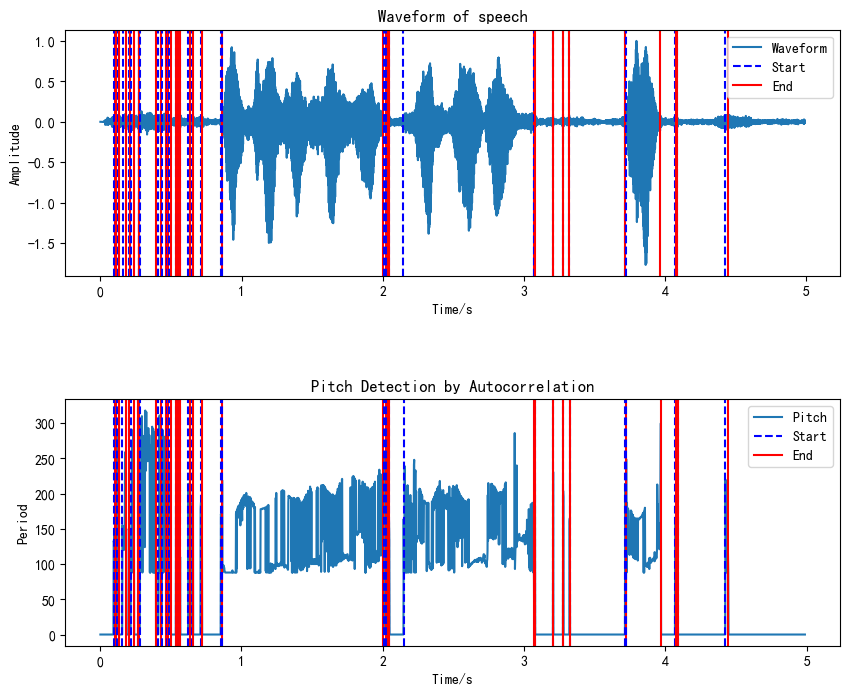

In [4]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 读取WAV文件
(fs, data) = wavfile.read('demo.wav')

# 删除数组开头的所有零
#data = cut_zero(data)

# 去除直流偏移
data = data - np.mean(data)

# 幅值归一化
data = data / np.max(data)

# 分析参数
wlen = 320  # 分析窗口长度
inc = 80    # 连续窗口间隔
N = len(data)
time = [i / fs for i in range(N)]  # 时间向量
T1 = 0.05  # 用于基音校正的阈值

# 进行基音校正并检测有声段
voiceseg, vsl, SF, Ef, period = pitch_Corr(data, wlen, inc, T1, fs)

# 计算帧数
fn = len(SF)

# 计算帧时间位置
frameTime = FrameTimeC(fn, wlen, inc, fs)

# 设置子图布局
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.5)  # 调整垂直间距

# 绘制波形图
axs[0].plot(time, data)
axs[0].set_title('Waveform of speech')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('Time/s')

# 绘制自相关基音周期检测图
axs[1].plot(frameTime, period)
axs[1].set_title('Pitch Detection by Autocorrelation')
axs[1].set_ylabel('Period')
axs[1].set_xlabel('Time/s')

# 标记有声段
for i in range(vsl):
    nx1 = voiceseg[i]['start']
    nx2 = voiceseg[i]['end']

    # 在波形图上标记有声段
    axs[0].axvline(frameTime[nx1], np.min(data), np.max(data), color='blue', linestyle='--')
    axs[0].axvline(frameTime[nx2], np.min(data), np.max(data), color='red', linestyle='-')

    # 在自相关基音周期检测图上标记有声段
    axs[1].axvline(frameTime[nx1], np.min(period), np.max(period), color='blue', linestyle='--')
    axs[1].axvline(frameTime[nx2], np.min(period), np.max(period), color='red', linestyle='-')

axs[0].legend(['Waveform', 'Start', 'End'])
axs[1].legend(['Pitch', 'Start', 'End'])

os.makedirs('figs', exist_ok=True) # 创建文件夹
plt.savefig('figs/pitch.png') # 保存图片
plt.show()





实验1-3：MFCC提取
需要补充下列方法: Nmfcc

In [21]:
def Nmfcc(x, fs, p, frameSize, inc, nfft=512, n_dct=12):
    """
    计算mfcc系数
    :param x: 输入信号
    :param fs: 采样率
    :param p: Mel滤波器组的个数
    :param frameSize: 分帧的每帧长度
    :param inc: 帧移
    :return: mfcc系数
    """
    # 预加重处理
    x_preemphasized = Ifilter([1, -0.9375], [1], x) # TODO 需要补充：输入x, 调用lfilter方法进行预加重

    # 分帧
    frames = enframe(x_preemphasized, frameSize, inc) # TODO 需要补充：输入frames, 调用enframe方法进行分帧

    # 加窗
    frames = np.hanning(frames)# TODO 需要补充：输入frames, 调用np.hanning和np.multiply方法进行加窗

    # 计算FFT
    fft_result = np.fft.rfft(frames)# TODO 需要补充：输入frames, 调用np.fft.rfft方法进行FFT

    # 计算能量谱
    power_spectrum = np.abs(fft_result) ** 2
    
    # 计算通过Mel滤波器的能量
    bank = melbankm(p, nfft, fs, 0, 0.5 * fs, 0)
    ss = np.matmul(power_spectrum, bank.T)
    
    # 计算DCT倒谱
    M = bank.shape[0] # 滤波器个数
    m = np.array([i for i in range(M)])
    mfcc = np.zeros((ss.shape[0], n_dct)) # 初始化mfcc系数
    for n in range(n_dct):
        mfcc[:, n] = # TODO 需要补充：输入M,m,ss, 调用np计算mfcc系数
    return mfcc

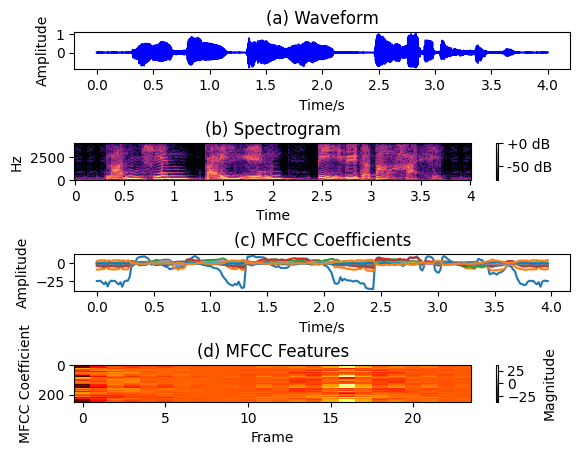

In [4]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

# 读取WAV文件
(framerate, wave_data) = wavfile.read("demo.wav")

# 参数设置
wlen = 256
inc = 128
num = 8
nfft = 256
n_dct = 24

# 归一化处理
x = wave_data / max(np.abs(wave_data))
time = np.arange(0, len(wave_data)) / framerate

# 绘制原始波形
plt.figure(1)
plt.subplot(411)
plt.plot(time, x, 'b')
plt.title("(a) Waveform")
plt.ylabel("Amplitude")
plt.xlabel("Time/s")

# 计算MFCC特征
ccc1 = librosa.feature.mfcc(y=x,
                            n_fft=wlen,
                            sr=framerate,
                            n_mfcc=24,
                            fmax=4000,
                            dct_type=2,
                            hop_length=inc,
                            win_length=wlen)
ccc2 = np.transpose(ccc1)

# 进行NMFCC计算
ccc1 = Nmfcc(x, framerate, num, wlen, inc, nfft, n_dct)
fn = ccc1.shape[0]
cn = ccc1.shape[1]
frameTime = FrameTimeC(fn, wlen, inc, framerate)

# # 计算语谱图
D = librosa.stft(x, n_fft=wlen, hop_length=inc)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# 绘制语谱图
plt.subplot(412)
librosa.display.specshow(D_db, sr=framerate, hop_length=inc, x_axis='time', y_axis='linear')
plt.title("(b) Spectrogram")
plt.colorbar(format='%+2.0f dB')

# 绘制MFCC系数
plt.subplot(413)
plt.plot(frameTime, ccc1[:, 0:int(cn/2)])
plt.title("(c) MFCC Coefficients")
plt.ylabel("Amplitude")
plt.xlabel("Time/s")




# 绘制MFCC特征图
plt.subplot(414)
plt.imshow(ccc1, cmap='hot', interpolation='nearest', aspect='auto')
plt.xlabel('Frame')
plt.ylabel('MFCC Coefficient')
plt.title('(d) MFCC Features')
plt.colorbar(label='Magnitude')

# 调整子图间距
plt.subplots_adjust(hspace=2)

os.makedirs('figs', exist_ok=True) # 创建文件夹
plt.savefig('figs/mfcc.png') # 保存图片
plt.show()





